In [1]:
%run auxStandardStructure.ipynb

Using TensorFlow backend.


In [2]:
import tensorflow as tf
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

No GPU found


## Preprocessing

In [3]:
all_releases_df = pd.read_csv('raw_data.csv')

In [4]:
X, y = generateStandardTimeSeriesStructure(all_releases_df, 2)

Generating a new dataframe without containing the last release...
... DONE!
checking class larger than window size...
DONE
Setting the features...
DONE
X: (6699, 16) y: (6699,)


In [5]:
print("Declaring a dictionary to save results...")
results_dict = dict()
print("... DONE!")

print("Splitting dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("General information:")
print("X Train set:", X_train.shape[0], "X Test set:", X_test.shape[0])
print("y Train set:", y_train.shape[0], "y Test set:", y_test.shape[0])
print("... DONE!")

print("Scaling features...")
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))
print("... DONE!")

print("Setting stratified k-fold...")
k=5
kf = StratifiedKFold(n_splits=k, shuffle=False, random_state=42)
print("k =", k)
print("... DONE!\n")

Declaring a dictionary to save results...
... DONE!
Splitting dataset into train and test sets...
General information:
X Train set: 4689 X Test set: 2010
y Train set: 4689 y Test set: 2010
... DONE!
Scaling features...
... DONE!
Setting stratified k-fold...
k = 5
... DONE!



In [6]:
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

## Statistical Analysis

In [7]:
all_releases_df.describe()

,instanceID,Path,releaseID,CountClassCoupled,SumCyclomatic,MaxInheritanceTree,PercentLackOfCohesion,CountLineCode,CountClassDerived,CountDeclMethodAll,CountDeclMethod,class_frequency,number_of_changes,will_change,change_probability
count,11576.000000,1.157600e+04,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000
mean,5788.500000,9.148070e+18,4.980736,5.731513,12.279976,0.737474,0.143208,25.408431,0.445836,7.048981,1.235228,3.253455,0.074724,0.027039,0.016102
std,3341.847693,5.334891e+18,2.099896,9.568403,22.150706,1.602837,0.267863,66.493345,5.198372,18.958755,3.239050,1.767779,0.330764,0.162203,0.071078
min,1.000000,1.733956e+15,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2894.750000,4.535835e+18,3.000000,0.000000,3.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,5788.500000,9.219503e+18,5.000000,3.000000,7.000000,0.000000,0.000000,9.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
75%,8682.250000,1.373644e+19,7.000000,7.000000,13.000000,0.000000,0.000000,21.000000,0.000000,6.000000,1.000000,5.000000,0.000000,0.000000,0.000000
max,11576.000000,1.843342e+19,8.000000,162.000000,488.000000,7.000000,1.000000,1369.000000,189.000000,413.000000,56.000000,8.000000,5.000000,1.000000,0.800000


0
False    4505
True      184
Name: 0, dtype: int64

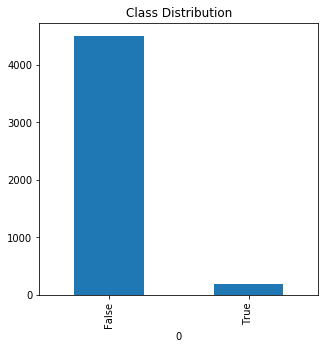

In [8]:
ax = y_train.groupby([0])[0].count().plot.bar(title="Class Distribution", figsize=(5,5))
y_train.groupby([0])[0].count()

In [9]:
X_train.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,-0.053,0.32,0.89,0.47,0.34,0.12,0.26,0.99,-0.038,0.33,0.88,0.47,0.34,0.11,0.25
1,-0.053,1.0,-0.026,-0.1,0.02,0.054,0.026,0.09,-0.026,0.97,-0.028,-0.073,0.02,0.063,0.026,0.09
2,0.32,-0.026,1.0,0.37,0.39,-0.052,0.18,0.22,0.34,-0.046,0.56,0.39,0.39,-0.047,0.17,0.22
3,0.89,-0.1,0.37,1.0,0.53,0.29,0.2,0.27,0.88,-0.088,0.39,0.99,0.52,0.29,0.2,0.26
4,0.47,0.02,0.39,0.53,1.0,-0.0087,0.32,0.81,0.48,0.0096,0.4,0.54,0.99,-0.0046,0.32,0.81
5,0.34,0.054,-0.052,0.29,-0.0087,1.0,0.06,0.049,0.33,0.06,-0.064,0.29,-0.0085,1.0,0.061,0.048
6,0.12,0.026,0.18,0.2,0.32,0.06,1.0,0.37,0.12,0.022,0.18,0.21,0.32,0.063,1.0,0.37
7,0.26,0.09,0.22,0.27,0.81,0.049,0.37,1.0,0.26,0.082,0.23,0.27,0.8,0.053,0.37,0.99
8,0.99,-0.026,0.34,0.88,0.48,0.33,0.12,0.26,1.0,-0.037,0.35,0.89,0.48,0.34,0.12,0.26
9,-0.038,0.97,-0.046,-0.088,0.0096,0.06,0.022,0.082,-0.037,1.0,-0.047,-0.087,0.0099,0.062,0.023,0.082


## Imbalanced baseline

In [10]:
%%time
LogisticRegr_(X_train, y_train, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.7383087860335363
2 of KFold 5
ROC AUC score: 0.6922188559258482
3 of KFold 5
ROC AUC score: 0.724240333563308
4 of KFold 5
ROC AUC score: 0.6911089780124187
5 of KFold 5
ROC AUC score: 0.7078862991737576

CROSS VALIDANTION SUMMARY:
Mean: 0.7107526505417737
Std deviation: 0.018324025649406515

TEST SET:
F1-Score(micro): 0.7830845771144279
F1-Score(macro): 0.5449806436605911
F1-Score(weighted): 0.8433474708634044
F1-Score(None): [0.87413395 0.21582734]
Accuracy: 0.7830845771144279
Sensitivity: 0.6382978723404256
Specificity: 0.7901878914405011
Confusion Matrix: [0.7901878914405011, 0.64]
ROC AUC score: 0.7142428818904633
CPU times: user 367 ms, sys: 213 ms, total: 580 ms
Wall time: 97.5 ms


In [11]:
%%time
DecisionTree_(X_train, y_train, X_test, y_test)

CPU times: user 14 µs, sys: 1e+03 ns, total: 15 µs
Wall time: 3.81 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.545370009298977
2 of KFold 5
ROC AUC score: 0.4724480307166211
3 of KFold 5
ROC AUC score: 0.5674025857155713
4 of KFold 5
ROC AUC score: 0.5601883792782795
5 of KFold 5
ROC AUC score: 0.5322635343445554

CROSS VALIDANTION SUMMARY:
Mean: 0.5355345078708009
Std deviation: 0.03379564385175918

TEST SET:
F1-Score(micro): 0.9079601990049752
F1-Score(macro): 0.5716699745086905
F1-Score(weighted): 0.9157018605458779
F1-Score(None): [0.95120021 0.19213974]
Accuracy: 0.9079601990049752
Sensitivity: 0.23404255319148937
Specificity: 0.9410229645093946
Confusion Matrix: [0.9410229645093946, 0.23]
ROC AUC score: 0.587532758850442
CPU times: user 331 ms, sys: 96.4 ms, total: 427 ms
Wall time: 57.1 ms


In [12]:
%%time
RandomForest_(X_train, y_train, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.502969673335933
2 of KFold 5
ROC AUC score: 0.4874313825479197
3 of KFold 5
ROC AUC score: 0.5785013648498665
4 of KFold 5
ROC AUC score: 0.5577736448990612
5 of KFold 5
ROC AUC score: 0.49668578123073126

CROSS VALIDANTION SUMMARY:
Mean: 0.5246723693727023
Std deviation: 0.03642637073969582

TEST SET:
F1-Score(micro): 0.9512437810945273
F1-Score(macro): 0.565034977388355
F1-Score(weighted): 0.9365621370254437
F1-Score(None): [0.97489754 0.15517241]
Accuracy: 0.9512437810945273
Sensitivity: 0.09574468085106383
Specificity: 0.9932150313152401
Confusion Matrix: [0.9932150313152401, 0.1]
ROC AUC score: 0.544479856083152
CPU times: user 882 ms, sys: 3.74 ms, total: 886 ms
Wall time: 880 ms


In [13]:
%%time
NN_(X_train, y_train, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5135135135135135
2 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5405405405405406
3 of KFold 5
ROC AUC score: 0.5647928727839937
4 of KFold 5
ROC AUC score: 0.5529441761406245
5 of KFold 5
ROC AUC score: 0.5661148107041559

CROSS VALIDANTION SUMMARY:
Mean: 0.5475811827365656
Std deviation: 0.01938389056410246

TEST SET:
F1-Score(micro): 0.9532338308457712
F1-Score(macro): 0.5827886517806671
F1-Score(weighted): 0.9391514375550175
F1-Score(None): [0.97592213 0.18965517]
Accuracy: 0.9532338308457712
Sensitivity: 0.11702127659574468
Specificity: 0.994258872651357
Confusion Matrix: [0.994258872651357, 0.12]
ROC AUC score: 0.5556400746235509
CPU times: user 39.4 s, sys: 23.5 s, total: 1min 2s
Wall time: 8.08 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Undersampling

In [14]:
print("Resampling dataset using Random UnderSampling (RUS)...")
X_RUS, y_RUS = RandomUnderSampler(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y RUS:", len(X_RUS), len(y_RUS))

Resampling dataset using Random UnderSampling (RUS)...
... DONE!
X and Y RUS: 368 368


In [15]:
%%time
LogisticRegr_(X_RUS, y_RUS, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.9444444444444444
2 of KFold 5
ROC AUC score: 0.7136150234741783
3 of KFold 5
ROC AUC score: 0.8611111111111112
4 of KFold 5
ROC AUC score: 0.910958904109589
5 of KFold 5
ROC AUC score: 0.5579710144927537

CROSS VALIDANTION SUMMARY:
Mean: 0.7976200995264152
Std deviation: 0.14347314605668374

TEST SET:
F1-Score(micro): 0.7761194029850746
F1-Score(macro): 0.5303699303836377
F1-Score(weighted): 0.8383173437810367
F1-Score(None): [0.87009238 0.19064748]
Accuracy: 0.7761194029850746
Sensitivity: 0.5638297872340425
Specificity: 0.7865344467640919
Confusion Matrix: [0.7865344467640919, 0.56]
ROC AUC score: 0.6751821169990672
CPU times: user 177 ms, sys: 155 ms, total: 332 ms
Wall time: 42.8 ms


In [16]:
%%time
DecisionTree_(X_RUS, y_RUS, X_test, y_test)

CPU times: user 15 µs, sys: 6 µs, total: 21 µs
Wall time: 4.77 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5
2 of KFold 5
ROC AUC score: 0.6314553990610328
3 of KFold 5
ROC AUC score: 0.4861111111111111
4 of KFold 5
ROC AUC score: 0.4931506849315068
5 of KFold 5
ROC AUC score: 0.4855072463768116

CROSS VALIDANTION SUMMARY:
Mean: 0.5192448882960925
Std deviation: 0.05635343392147071

TEST SET:
F1-Score(micro): 0.9432835820895522
F1-Score(macro): 0.5103846153846154
F1-Score(weighted): 0.9277083811710678
F1-Score(None): [0.97076923 0.05      ]
Accuracy: 0.9432835820895522
Sensitivity: 0.031914893617021274
Specificity: 0.9879958246346555
Confusion Matrix: [0.9879958246346555, 0.03]
ROC AUC score: 0.5099553591258384
CPU times: user 175 ms, sys: 75.7 ms, total: 251 ms
Wall time: 32.7 ms


In [17]:
%%time
RandomForest_(X_RUS, y_RUS, X_test, y_test)

CPU times: user 14 µs, sys: 7 µs, total: 21 µs
Wall time: 4.77 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5
2 of KFold 5
ROC AUC score: 0.4859154929577465
3 of KFold 5
ROC AUC score: 0.5
4 of KFold 5
ROC AUC score: 0.5
5 of KFold 5
ROC AUC score: 0.5

CROSS VALIDANTION SUMMARY:
Mean: 0.4971830985915493
Std deviation: 0.005633802816901401

TEST SET:
F1-Score(micro): 0.9522388059701492
F1-Score(macro): 0.4877675840978593
F1-Score(weighted): 0.9299131255039785
F1-Score(None): [0.97553517 0.        ]
Accuracy: 0.9522388059701492
Sensitivity: 0.0
Specificity: 0.9989561586638831
Confusion Matrix: [0.9989561586638831, 0.0]
ROC AUC score: 0.49947807933194155
CPU times: user 370 ms, sys: 51.7 ms, total: 422 ms
Wall time: 300 ms


In [18]:
%%time
NN_(X_RUS, y_RUS, X_test, y_test)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 3.81 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5
2 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5
3 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5
4 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5
5 of KFold 5
ROC AUC score: 0.5

CROSS VALIDANTION SUMMARY:
Mean: 0.5
Std deviation: 0.0

TEST SET:
F1-Score(micro): 0.9532338308457712
F1-Score(macro): 0.4880285277636271
F1-Score(weighted): 0.9304106061642881
F1-Score(None): [0.97605706 0.        ]
Accuracy: 0.9532338308457712
Sensitivity: 0.0
Specificity: 1.0
Confusion Matrix: [1.0, 0.0]
ROC AUC score: 0.5
CPU times: user 5.26 s, sys: 3.19 s, total: 8.45 s
Wall time: 1.14 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars
/usr/lib/python3/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars


In [19]:
print("Resampling dataset using Edited Nearest Neighbour (ENN)...")
X_ENN, y_ENN = EditedNearestNeighbours(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y ENN:", len(X_ENN), len(y_ENN))

Resampling dataset using Edited Nearest Neighbour (ENN)...
... DONE!
X and Y ENN: 4289 4289


In [20]:
%%time
LogisticRegr_(X_ENN, y_ENN, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.7783860502838604
2 of KFold 5
ROC AUC score: 0.6906047338446851
3 of KFold 5
ROC AUC score: 0.7189650064193304
4 of KFold 5
ROC AUC score: 0.5966183574879227
5 of KFold 5
ROC AUC score: 0.7606914745903917

CROSS VALIDANTION SUMMARY:
Mean: 0.709053124525238
Std deviation: 0.06411511389964478

TEST SET:
F1-Score(micro): 0.781592039800995
F1-Score(macro): 0.5466299746543554
F1-Score(weighted): 0.8424840746524047
F1-Score(None): [0.87301128 0.22024867]
Accuracy: 0.781592039800995
Sensitivity: 0.6595744680851063
Specificity: 0.7875782881002088
Confusion Matrix: [0.7875782881002088, 0.66]
ROC AUC score: 0.7235763780926576
CPU times: user 688 ms, sys: 394 ms, total: 1.08 s
Wall time: 148 ms


In [21]:
%%time
DecisionTree_(X_ENN, y_ENN, X_test, y_test)

CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 4.53 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.4871248986212489
2 of KFold 5
ROC AUC score: 0.5469763307765745
3 of KFold 5
ROC AUC score: 0.5131349376172762
4 of KFold 5
ROC AUC score: 0.6525362318840578
5 of KFold 5
ROC AUC score: 0.5816902712209572

CROSS VALIDANTION SUMMARY:
Mean: 0.556292534024023
Std deviation: 0.05769129222034242

TEST SET:
F1-Score(micro): 0.9169154228855722
F1-Score(macro): 0.5707956398043667
F1-Score(weighted): 0.9201752767982484
F1-Score(None): [0.95622543 0.18536585]
Accuracy: 0.9169154228855722
Sensitivity: 0.20212765957446807
Specificity: 0.9519832985386222
Confusion Matrix: [0.9519832985386222, 0.2]
ROC AUC score: 0.5770554790565452
CPU times: user 337 ms, sys: 121 ms, total: 458 ms
Wall time: 68.8 ms


In [22]:
%%time
RandomForest_(X_ENN, y_ENN, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.4956407137064071
2 of KFold 5
ROC AUC score: 0.5277512591763506
3 of KFold 5
ROC AUC score: 0.52896928597294
4 of KFold 5
ROC AUC score: 0.5628019323671498
5 of KFold 5
ROC AUC score: 0.5582708506896231

CROSS VALIDANTION SUMMARY:
Mean: 0.534686808382494
Std deviation: 0.024298381275161332

TEST SET:
F1-Score(micro): 0.9497512437810945
F1-Score(macro): 0.532126139954229
F1-Score(weighted): 0.932817524457941
F1-Score(None): [0.97416219 0.09009009]
Accuracy: 0.9497512437810945
Sensitivity: 0.05319148936170213
Specificity: 0.9937369519832986
Confusion Matrix: [0.9937369519832986, 0.05]
ROC AUC score: 0.5234642206725003
CPU times: user 900 ms, sys: 8.32 ms, total: 908 ms
Wall time: 901 ms


In [23]:
%%time
NN_(X_ENN, y_ENN, X_test, y_test)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.81 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5253446877534469
2 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5810810810810811
3 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5645225005760937
4 of KFold 5
ROC AUC score: 0.5333333333333333
5 of KFold 5
ROC AUC score: 0.5733129686198277

CROSS VALIDANTION SUMMARY:
Mean: 0.5555189142727566
Std deviation: 0.02215310928977277

TEST SET:
F1-Score(micro): 0.9517412935323383
F1-Score(macro): 0.5730437467562756
F1-Score(weighted): 0.9375376348841076
F1-Score(None): [0.97514732 0.17094017]
Accuracy: 0.9517412935323383
Sensitivity: 0.10638297872340426
Specificity: 0.9932150313152401
Confusion Matrix: [0.9932150313152401, 0.11]
ROC AUC score: 0.5497990050193222
CPU times: user 39.1 s, sys: 22.1 s, total: 1min 1s
Wall time: 7.88 s


In [24]:
print("Resampling dataset using Tomek's Link (TL)...")
X_TL, y_TL = TomekLinks(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y TL:", len(X_TL), len(y_TL))

Resampling dataset using Tomek's Link (TL)...
... DONE!
X and Y TL: 4662 4662


In [25]:
%%time
LogisticRegr_(X_TL, y_TL, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.7352749907097733
2 of KFold 5
ROC AUC score: 0.6956189356071744
3 of KFold 5
ROC AUC score: 0.7243589743589745
4 of KFold 5
ROC AUC score: 0.6765960809102401
5 of KFold 5
ROC AUC score: 0.7343457067866516

CROSS VALIDANTION SUMMARY:
Mean: 0.7132389376745628
Std deviation: 0.02327187992530786

TEST SET:
F1-Score(micro): 0.7791044776119403
F1-Score(macro): 0.5448443849656456
F1-Score(weighted): 0.8408373730388419
F1-Score(None): [0.87137891 0.21830986]
Accuracy: 0.7791044776119403
Sensitivity: 0.6595744680851063
Specificity: 0.7849686847599165
Confusion Matrix: [0.7849686847599165, 0.66]
ROC AUC score: 0.7222715764225114
CPU times: user 672 ms, sys: 350 ms, total: 1.02 s
Wall time: 136 ms


In [26]:
%%time
DecisionTree_(X_TL, y_TL, X_test, y_test)

CPU times: user 12 µs, sys: 6 µs, total: 18 µs
Wall time: 5.01 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5477053140096618
2 of KFold 5
ROC AUC score: 0.4981329020876213
3 of KFold 5
ROC AUC score: 0.5773963173292033
4 of KFold 5
ROC AUC score: 0.5662136536030341
5 of KFold 5
ROC AUC score: 0.5257780277465317

CROSS VALIDANTION SUMMARY:
Mean: 0.5430452429552104
Std deviation: 0.028473717383213793

TEST SET:
F1-Score(micro): 0.9054726368159204
F1-Score(macro): 0.5790343915343915
F1-Score(weighted): 0.915062912948485
F1-Score(None): [0.94973545 0.20833333]
Accuracy: 0.9054726368159204
Sensitivity: 0.26595744680851063
Specificity: 0.9368475991649269
Confusion Matrix: [0.9368475991649269, 0.27]
ROC AUC score: 0.6014025229867188
CPU times: user 329 ms, sys: 166 ms, total: 496 ms
Wall time: 73.8 ms


In [27]:
%%time
RandomForest_(X_TL, y_TL, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5166295057599406
2 of KFold 5
ROC AUC score: 0.48745957071449575
3 of KFold 5
ROC AUC score: 0.574083634486319
4 of KFold 5
ROC AUC score: 0.5531763590391909
5 of KFold 5
ROC AUC score: 0.5205286839145107

CROSS VALIDANTION SUMMARY:
Mean: 0.5303755507828913
Std deviation: 0.03019261275310208

TEST SET:
F1-Score(micro): 0.9482587064676616
F1-Score(macro): 0.5459955346671416
F1-Score(weighted): 0.9333758195617227
F1-Score(None): [0.973347   0.11864407]
Accuracy: 0.9482587064676616
Sensitivity: 0.07446808510638298
Specificity: 0.9911273486430062
Confusion Matrix: [0.9911273486430062, 0.07]
ROC AUC score: 0.5327977168746946
CPU times: user 986 ms, sys: 9.31 ms, total: 995 ms
Wall time: 990 ms


In [28]:
%%time
NN_(X_TL, y_TL, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.527220364176886
2 of KFold 5
ROC AUC score: 0.5526315789473684
3 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5613061435209087
4 of KFold 5
ROC AUC score: 0.5335018963337548
5 of KFold 5
ROC AUC score: 0.5567116610423697

CROSS VALIDANTION SUMMARY:
Mean: 0.5462743288042575
Std deviation: 0.013427558129021275

TEST SET:
F1-Score(micro): 0.9532338308457712
F1-Score(macro): 0.5683305307793538
F1-Score(weighted): 0.9378214753109727
F1-Score(None): [0.97594678 0.16071429]
Accuracy: 0.9532338308457712
Sensitivity: 0.09574468085106383
Specificity: 0.9953027139874739
Confusion Matrix: [0.9953027139874739, 0.1]
ROC AUC score: 0.5455236974192689
CPU times: user 39.5 s, sys: 23.4 s, total: 1min 2s
Wall time: 8.04 s


## Oversampling

In [29]:
print("Resampling dataset using Random OverSampling (ROS)...")
ros = RandomOverSampler(random_state=42)
X_ROS, y_ROS = ros.fit_resample(X_train, y_train)
print("X and Y ROS:", len(X_ROS), len(y_ROS))

Resampling dataset using Random OverSampling (ROS)...
X and Y ROS: 9010 9010


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
%%time
LogisticRegr_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 13 µs, sys: 7 µs, total: 20 µs
Wall time: 5.01 µs

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.7225305216426193
2 of KFold 5
ROC AUC score: 0.7186459489456161
3 of KFold 5
ROC AUC score: 0.7114317425083242
4 of KFold 5
ROC AUC score: 0.7086570477247502
5 of KFold 5
ROC AUC score: 0.7241953385127635

CROSS VALIDANTION SUMMARY:
Mean: 0.7170921198668146
Std deviation: 0.006093219636541956

TEST SET:
F1-Score(micro): 0.7756218905472637
F1-Score(macro): 0.5423689026314129
F1-Score(weighted): 0.8385270517482631
F1-Score(None): [0.86908563 0.21565217]
Accuracy: 0.7756218905472637
Sensitivity: 0.6595744680851063
Specificity: 0.7813152400835073
Confusion Matrix: [0.7813152400835073, 0.66]
ROC AUC score: 0.7204448540843068
CPU times: user 1.2 s, sys: 644 ms, total: 1.84 s
Wall time: 235 ms


In [31]:
%%time
DecisionTree_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 12 µs, sys: 7 µs, total: 19 µs
Wall time: 4.77 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.9433962264150944
2 of KFold 5
ROC AUC score: 0.9428412874583796
3 of KFold 5
ROC AUC score: 0.9500554938956715
4 of KFold 5
ROC AUC score: 0.9556048834628192
5 of KFold 5
ROC AUC score: 0.9528301886792454

CROSS VALIDANTION SUMMARY:
Mean: 0.9489456159822419
Std deviation: 0.005073975338806917

TEST SET:
F1-Score(micro): 0.9034825870646768
F1-Score(macro): 0.5633488013759989
F1-Score(weighted): 0.9126857560122847
F1-Score(None): [0.9487315 0.1779661]
Accuracy: 0.9034825870646767
Sensitivity: 0.22340425531914893
Specificity: 0.9368475991649269
Confusion Matrix: [0.9368475991649269, 0.22]
ROC AUC score: 0.5801259272420379
CPU times: user 387 ms, sys: 126 ms, total: 513 ms
Wall time: 103 ms


In [32]:
%%time
RandomForest_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.9500554938956715
2 of KFold 5
ROC AUC score: 0.9500554938956715
3 of KFold 5
ROC AUC score: 0.9506104328523861
4 of KFold 5
ROC AUC score: 0.9589345172031077
5 of KFold 5
ROC AUC score: 0.9572697003329633

CROSS VALIDANTION SUMMARY:
Mean: 0.9533851276359598
Std deviation: 0.003892492323363009

TEST SET:
F1-Score(micro): 0.9338308457711443
F1-Score(macro): 0.602704811443433
F1-Score(weighted): 0.9314849937568336
F1-Score(None): [0.96540962 0.24      ]
Accuracy: 0.9338308457711443
Sensitivity: 0.22340425531914893
Specificity: 0.9686847599164927
Confusion Matrix: [0.9686847599164927, 0.22]
ROC AUC score: 0.5960445076178208
CPU times: user 1.7 s, sys: 4.73 ms, total: 1.71 s
Wall time: 1.72 s


In [33]:
%%time
NN_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7730299667036626
2 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7774694783573807
3 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7702552719200888
4 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7752497225305217
5 of KFold 5
ROC AUC score: 0.7874583795782464

CROSS VALIDANTION SUMMARY:
Mean: 0.7766925638179801
Std deviation: 0.005889677763117231

TEST SET:
F1-Score(micro): 0.7407960199004975
F1-Score(macro): 0.5177283342490206
F1-Score(weighted): 0.8150431281458685
F1-Score(None): [0.84572105 0.18973561]
Accuracy: 0.7407960199004975
Sensitivity: 0.648936170212766
Specificity: 0.7453027139874739
Confusion Matrix: [0.7453027139874739, 0.65]
ROC AUC score: 0.69711944210012
CPU times: user 1min 36s, sys: 56.8 s, total: 2min 32s
Wall time: 19.8 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [34]:
print("Resampling dataset using SMOTE (SMO)...")
sm = SMOTE(random_state=42)
X_SMO, y_SMO = sm.fit_resample(X_train, y_train)
print("X and Y SMO:", len(X_SMO), len(y_SMO))

Resampling dataset using SMOTE (SMO)...
X and Y SMO: 9010 9010


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
%%time
LogisticRegr_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 11 µs, sys: 6 µs, total: 17 µs
Wall time: 4.77 µs

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.7386237513873474
2 of KFold 5
ROC AUC score: 0.720865704772475
3 of KFold 5
ROC AUC score: 0.7219755826859046
4 of KFold 5
ROC AUC score: 0.7197558268590455
5 of KFold 5
ROC AUC score: 0.7008879023307436

CROSS VALIDANTION SUMMARY:
Mean: 0.7204217536071031
Std deviation: 0.011966110518928793

TEST SET:
F1-Score(micro): 0.7681592039800995
F1-Score(macro): 0.5384492573086506
F1-Score(weighted): 0.833605479336422
F1-Score(None): [0.86406068 0.21283784]
Accuracy: 0.7681592039800995
Sensitivity: 0.6702127659574468
Specificity: 0.7729645093945721
Confusion Matrix: [0.7729645093945721, 0.67]
ROC AUC score: 0.7215886376760094
CPU times: user 1.4 s, sys: 904 ms, total: 2.3 s
Wall time: 307 ms


In [36]:
%%time
DecisionTree_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 10 µs, sys: 5 µs, total: 15 µs
Wall time: 4.77 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.9012208657047724
2 of KFold 5
ROC AUC score: 0.9472807991120976
3 of KFold 5
ROC AUC score: 0.9550499445061043
4 of KFold 5
ROC AUC score: 0.9528301886792453
5 of KFold 5
ROC AUC score: 0.9539400665926747

CROSS VALIDANTION SUMMARY:
Mean: 0.9420643729189788
Std deviation: 0.020595937184041936

TEST SET:
F1-Score(micro): 0.673134328358209
F1-Score(macro): 0.4576293601433541
F1-Score(weighted): 0.7675346893363025
F1-Score(None): [0.79951175 0.11574697]
Accuracy: 0.673134328358209
Sensitivity: 0.4574468085106383
Specificity: 0.6837160751565762
Confusion Matrix: [0.6837160751565762, 0.46]
ROC AUC score: 0.5705814418336073
CPU times: user 392 ms, sys: 228 ms, total: 620 ms
Wall time: 215 ms


In [37]:
%%time
RandomForest_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 4.05 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.9223085460599333
2 of KFold 5
ROC AUC score: 0.9705882352941178
3 of KFold 5
ROC AUC score: 0.9728079911209766
4 of KFold 5
ROC AUC score: 0.9744728079911209
5 of KFold 5
ROC AUC score: 0.9678135405105439

CROSS VALIDANTION SUMMARY:
Mean: 0.9615982241953386
Std deviation: 0.01977140888697477

TEST SET:
F1-Score(micro): 0.7716417910447761
F1-Score(macro): 0.5082821721308198
F1-Score(weighted): 0.8344828693852238
F1-Score(None): [0.86814134 0.14842301]
Accuracy: 0.7716417910447761
Sensitivity: 0.425531914893617
Specificity: 0.7886221294363257
Confusion Matrix: [0.7886221294363257, 0.43]
ROC AUC score: 0.6070770221649713
CPU times: user 3.2 s, sys: 2.26 ms, total: 3.21 s
Wall time: 3.2 s


In [38]:
%%time
NN_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.81 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8007769145394006
2 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7835738068812431
3 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7935627081021088
4 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7802441731409545
5 of KFold 5
ROC AUC score: 0.7774694783573808

CROSS VALIDANTION SUMMARY:
Mean: 0.7871254162042176
Std deviation: 0.00872931502873944

TEST SET:
F1-Score(micro): 0.7303482587064677
F1-Score(macro): 0.5134641218755805
F1-Score(weighted): 0.8079223165893483
F1-Score(None): [0.83830549 0.18862275]
Accuracy: 0.7303482587064677
Sensitivity: 0.6702127659574468
Specificity: 0.7332985386221295
Confusion Matrix: [0.7332985386221295, 0.67]
ROC AUC score: 0.7017556522897882
CPU times: user 1min 32s, sys: 52.7 s, total: 2min 25s
Wall time: 18.5 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [39]:
print("Resampling dataset using ADASYN (ADA)...")
ada = ADASYN(random_state=42)
X_ADA, y_ADA = ada.fit_resample(X_train, y_train)
print("X and Y ADA:", len(X_ADA), len(y_ADA))

Resampling dataset using ADASYN (ADA)...
X and Y ADA: 8995 8995


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
%%time
LogisticRegr_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 21 µs, sys: 0 ns, total: 21 µs
Wall time: 5.25 µs

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.7380879695661094
2 of KFold 5
ROC AUC score: 0.677417939483227
3 of KFold 5
ROC AUC score: 0.7058217916741852
4 of KFold 5
ROC AUC score: 0.6718518646690511
5 of KFold 5
ROC AUC score: 0.7208570531629048

CROSS VALIDANTION SUMMARY:
Mean: 0.7028073237110956
Std deviation: 0.025228812886479393

TEST SET:
F1-Score(micro): 0.7562189054726368
F1-Score(macro): 0.5327798861480075
F1-Score(weighted): 0.8256618237087805
F1-Score(None): [0.85588235 0.20967742]
Accuracy: 0.7562189054726368
Sensitivity: 0.6914893617021277
Specificity: 0.7593945720250522
Confusion Matrix: [0.7593945720250522, 0.69]
ROC AUC score: 0.72544196686359
CPU times: user 1.35 s, sys: 683 ms, total: 2.03 s
Wall time: 270 ms


In [41]:
%%time
DecisionTree_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 10 µs, sys: 6 µs, total: 16 µs
Wall time: 5.25 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.8475036398557405
2 of KFold 5
ROC AUC score: 0.9315775097701391
3 of KFold 5
ROC AUC score: 0.9048644292780356
4 of KFold 5
ROC AUC score: 0.903218151571256
5 of KFold 5
ROC AUC score: 0.9288176463172569

CROSS VALIDANTION SUMMARY:
Mean: 0.9031962753584855
Std deviation: 0.030220529385984667

TEST SET:
F1-Score(micro): 0.5129353233830846
F1-Score(macro): 0.382784047656164
F1-Score(weighted): 0.6397023839231729
F1-Score(None): [0.66621207 0.09935603]
Accuracy: 0.5129353233830846
Sensitivity: 0.574468085106383
Specificity: 0.5099164926931107
Confusion Matrix: [0.5099164926931107, 0.57]
ROC AUC score: 0.5421922888997468
CPU times: user 490 ms, sys: 125 ms, total: 616 ms
Wall time: 214 ms


In [42]:
%%time
RandomForest_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 4.53 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.8875723336357277
2 of KFold 5
ROC AUC score: 0.9460485627204616
3 of KFold 5
ROC AUC score: 0.9137564299998271
4 of KFold 5
ROC AUC score: 0.9438306608099389
5 of KFold 5
ROC AUC score: 0.9388102553707957

CROSS VALIDANTION SUMMARY:
Mean: 0.9260036485073501
Std deviation: 0.022407902430773383

TEST SET:
F1-Score(micro): 0.7268656716417911
F1-Score(macro): 0.4853055381812534
F1-Score(weighted): 0.8049297670593214
F1-Score(None): [0.83790965 0.13270142]
Accuracy: 0.7268656716417911
Sensitivity: 0.44680851063829785
Specificity: 0.7406054279749478
Confusion Matrix: [0.7406054279749478, 0.45]
ROC AUC score: 0.5937069693066228
CPU times: user 3.22 s, sys: 4.04 ms, total: 3.22 s
Wall time: 3.21 s


In [43]:
%%time
NN_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7514250436906285
2 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7313934776751394
3 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7325237486682701
4 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7659053662226332
5 of KFold 5
ROC AUC score: 0.773147381404972

CROSS VALIDANTION SUMMARY:
Mean: 0.7508790035323286
Std deviation: 0.016962143070317612

TEST SET:
F1-Score(micro): 0.7378109452736319
F1-Score(macro): 0.5158240388997244
F1-Score(weighted): 0.8130026894605322
F1-Score(None): [0.84366657 0.18798151]
Accuracy: 0.7378109452736319
Sensitivity: 0.648936170212766
Specificity: 0.7421711899791231
Confusion Matrix: [0.7421711899791231, 0.65]
ROC AUC score: 0.6955536800959448
CPU times: user 1min 29s, sys: 53.3 s, total: 2min 23s
Wall time: 18.2 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
